In [1]:
import pandas as pd
import numpy as np
import re

# ML libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Visualization
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Resume.csv")

df.head()

,ID,Resume_str,Resume_html,Category
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR


In [3]:
print(df.shape)
print(df.columns)

df['Category'].value_counts()

(2484, 4)
Index(['ID', 'Resume_str', 'Resume_html', 'Category'], dtype='object')


Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
ACCOUNTANT                118
FINANCE                   118
FITNESS                   117
AVIATION                  117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

In [5]:
def clean_text(text):
    
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\W', ' ', text)
    text = text.lower()
    
    return text

df['cleaned_resume'] = df['Resume_str'].apply(clean_text)

df.head()

,ID,Resume_str,Resume_html,Category,cleaned_resume
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administrator marketing associate ...
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr operations ...
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary over 2...
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedica...
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlights ...


In [6]:
job_description = """
Looking for Data Scientist with skills in Python, Machine Learning,
Data Analysis, Pandas, Numpy, Scikit-learn, Deep Learning.
"""

In [7]:
vectorizer = TfidfVectorizer(stop_words='english')

resume_vectors = vectorizer.fit_transform(df['cleaned_resume'])

job_vector = vectorizer.transform([job_description])

In [8]:
similarity_scores = cosine_similarity(job_vector, resume_vectors)

similarity_scores = similarity_scores.flatten()

df['Score'] = similarity_scores

df.head()

,ID,Resume_str,Resume_html,Category,cleaned_resume,Score
0,16852973,HR ADMINISTRATOR/MARKETING ASSOCIATE\...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr administrator marketing associate ...,0.012410
1,22323967,"HR SPECIALIST, US HR OPERATIONS ...","<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist us hr operations ...,0.000546
2,33176873,HR DIRECTOR Summary Over 2...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr director summary over 2...,0.000821
3,27018550,HR SPECIALIST Summary Dedica...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr specialist summary dedica...,0.002660
4,17812897,HR MANAGER Skill Highlights ...,"<div class=""fontsize fontface vmargins hmargin...",HR,hr manager skill highlights ...,0.003866


In [9]:
ranked_df = df.sort_values(by='Score', ascending=False)

ranked_df[['Category', 'Score']].head(10)

,Category,Score
1339,AUTOMOBILE,0.200223
926,AGRICULTURE,0.159254
1762,ENGINEERING,0.139703
2153,BANKING,0.123122
2291,ARTS,0.120354
1218,CONSULTANT,0.110212
929,AGRICULTURE,0.107094
194,DESIGNER,0.101989
331,INFORMATION-TECHNOLOGY,0.093105
374,TEACHER,0.089694


In [10]:
top_candidates = ranked_df.head(5)

print("Top Candidates:\n")

for i, row in top_candidates.iterrows():
    
    print("Category:", row['Category'])
    print("Score:", round(row['Score'], 3))
    print("-"*50)

Top Candidates:

Category: AUTOMOBILE
Score: 0.2
--------------------------------------------------
Category: AGRICULTURE
Score: 0.159
--------------------------------------------------
Category: ENGINEERING
Score: 0.14
--------------------------------------------------
Category: BANKING
Score: 0.123
--------------------------------------------------
Category: ARTS
Score: 0.12
--------------------------------------------------


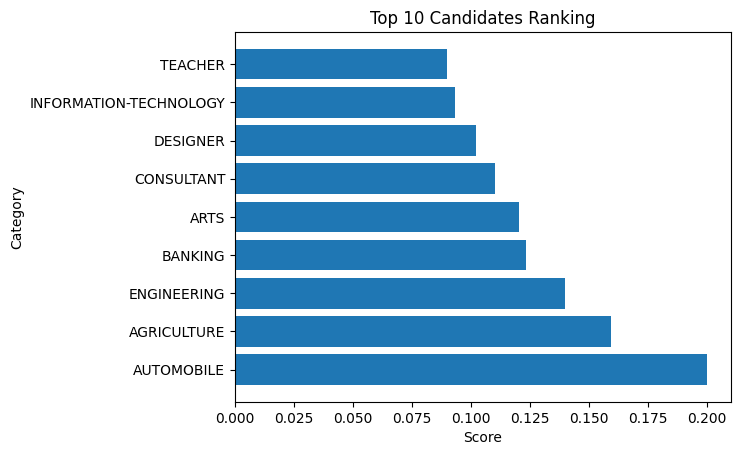

In [11]:
top10 = ranked_df.head(10)

plt.figure()

plt.barh(top10['Category'], top10['Score'])

plt.title("Top 10 Candidates Ranking")

plt.xlabel("Score")

plt.ylabel("Category")

plt.show()

Project: FUTURE_ML_03 – Resume Screening System

Purpose:
Build ML model to screen and rank resumes based on job description.

Dataset:
Kaggle Resume Dataset

Tools:
Python
Jupyter Notebook
Scikit-learn
TF-IDF
Cosine Similarity

Steps:
1. Load dataset
2. Clean resume text
3. Enter job description
4. Convert text to TF-IDF
5. Calculate similarity
6. Rank candidates
7. Identify missing skills
8. 